In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load and preprocess data
mnist = tf.keras.datasets.mnist
#choose pictures of number 2 and number 6
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() #include all numbers from 0 to 9
index_train = np.where((train_labels ==2)|(train_labels ==6)) #include of numbers 3 and 5 in training data
index_test = np.where((test_labels ==2)|(test_labels ==6)) #index of numbers 3 and 5 in test data
train_images_26 = train_images[index_train]
train_images_26 = train_images_26.reshape((len(train_images_26), train_images_26[1].size))
#label of number 2: -1; label of number 6: +1
train_labels_26 = train_labels[index_train].astype('int')
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26), train_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')
#change labels from '2' and '6' to '-1' and '+1'
train_labels_26[np.where(train_labels_26==2)]= -1
train_labels_26[np.where(train_labels_26==6)]= 1
test_labels_26[np.where(test_labels_26)==2]= -1
test_labels_26[np.where(test_labels_26)==6]= 1

11501568/11490434 [==============================] - 0s 0us/step


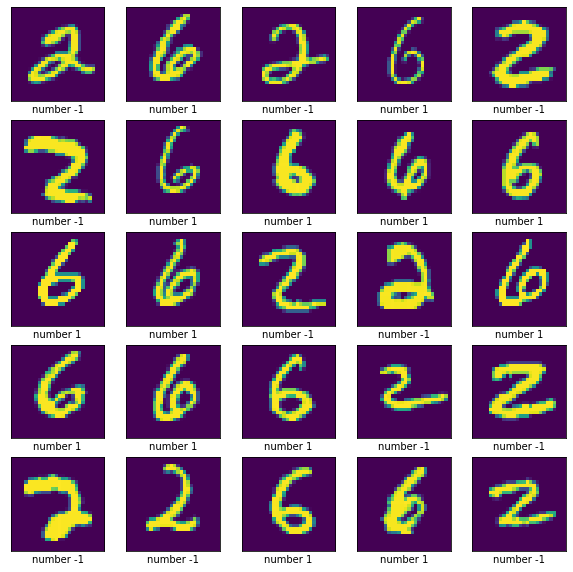

In [4]:
#show the first 25 training data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_26[i].reshape((28,28)),)
  plt.xlabel('number '+ str(train_labels_26[i]))
plt.show()

In [5]:
#append dummy feature 1 to feature vectors, and then normalize
train_images_26_w_dummy = np.insert(train_images_26,784,1,axis=1)/255 
test_images_26_w_dummy = np.insert(test_images_26,784,1,axis=1)/255
train_images_26_w_dummy = train_images_26_w_dummy[range(1000)] #choose a subset of the entire training dataset
train_labels_26_w_dummy = train_labels_26[range(1000)]
#check the dimension, the feature vector of each sample shall be 785
print(train_images_26_w_dummy.shape)
print(train_images_26_w_dummy.shape)
print(test_images_26_w_dummy.shape)


(1000, 785)
(1000, 785)
(1990, 785)


In [18]:
def get_acc(x_test, y_test):
  count= 0
  for i in range(len(x_test)):
    wtx = np.dot(weights,x_test[i])
    if wtx[0]*y_test[i]>0:
      count+=1

  acc = (count/len(x_test))*100
  return acc




In [28]:
x_train = train_images_26_w_dummy
y_train = train_labels_26_w_dummy
x_test = test_images_26_w_dummy
y_test = test_labels_26

print(y_test.shape)
print(x_test.shape)


weights = np.ones((1,785))
print(weights.shape)
print(x_train.shape)
alpha = 0.1
# w = np.random.random(785)
# w_t = np.transpose(weights)
print("len xt",len(x_train))
train_acc = 0
epoch = 0
# while train_acc <=85:
for i in range(len(x_train)):
  if train_acc >= 95:
    break
  wtx = np.dot(weights,x_train[i])
  if wtx[0]*y_train[i]<=0:
    # print('w',weights.shape)
    weights = weights+(alpha*y_train[i]*x_train[i])
  train_acc = get_acc(x_train, y_train)
err = 100 - train_acc
print(f'epoch: {i} Training accuracy {train_acc}')
print(f'Training error is {err}')
print(f'test acc: {get_acc(x_test, y_test)}')
print(f'test err: {100 - (get_acc(x_test, y_test))}')




(1990,)
(1990, 785)
(1, 785)
(1000, 785)
len xt 1000
epoch: 341 Training accuracy 95.19999999999999
Training error is 4.800000000000011
test acc: 51.005025125628144
test err: 48.994974874371856


In [29]:
#stopping criterion 2
weights = np.ones((1,785))
print(weights.shape)
print(x_train.shape)
alpha = 0.1
# w = np.random.random(785)
# w_t = np.transpose(weights)
print("len xt",len(x_train))
train_acc = 0
epoch = 0
for i in range(len(x_train)):
  if train_acc >= 80:
    break
  wtx = np.dot(weights,x_train[i])
  if wtx[0]*y_train[i]<=0:
    # print('w',weights.shape)
    weights = weights+(alpha*y_train[i]*x_train[i])
  train_acc = get_acc(x_train, y_train)
err = 100 - train_acc
#print(f"Weights are {weights}")
print(weights.shape)
print(f'epoch: {i} Training accuracy {train_acc}')
print(f'Training error is {err}')
print(f'test acc: {get_acc(x_test, y_test)}')
print(f'test err: {100 - (get_acc(x_test, y_test))}')


(1, 785)
(1000, 785)
len xt 1000
(1, 785)
epoch: 58 Training accuracy 80.10000000000001
Training error is 19.89999999999999
test acc: 67.1859296482412
test err: 32.8140703517588


In [123]:

#Testing error logic check

#weights = np.ones((1,785))
print(weights.shape)
print(x_test.shape)
alpha = 0.1
# w = np.random.random(785)
# w_t = np.transpose(weights)
print("len xt",len(x_test))
test_acc = 0
epoch = 0
# while train_acc <=85:
y_pred = []
print('x', x_test.shape)
print(weights.shape)
count_negative =0
count_positive=0
y_test.reshape(1990,1)
#weight_new = np.transpose(weights)
for i in range(len(x_test)):
  if test_acc >= 95:
    break
  y_pred = np.dot(x_test,np.transpose(weights))
  if y_pred[i]*y_test[i]<=0:
    count_negative+=1
  else:
    count_positive+=1

# print(y_test)
# print(y_pred)

# print("hey i am here",y_pred)
# print(type(y_pred))
# print('x',x_test.shape)
# print(x_test[0])
# print('weight',weights.shape)
print(y_pred.shape)


accue = (count_positive/len(y_test))*100
print(accue)


(1, 785)
(1990, 785)
len xt 1990
x (1990, 785)
(1, 785)
(1990, 1)
67.1859296482412


array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])